In [ ]:
!pip install -q sklearn

In [ ]:
import numpy as np 
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels= []
train_samples = []

Example data:
- An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial
- The trial had 2100 participants. Half were under 65 years old, half were 65 yearrs or older
- 95% of patients 65 or older experienced side effects
- 95% of patients under 65 experienced no side effects

In [ ]:
for i in range(50):
  # the 5% of younger individuals who did experience side effects
  random_younger = randint(13, 65)
  train_samples.append(random_younger)
  train_labels.append(1)

  # the 5% of older individuals who did not experience side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  # the 95% of younger individuals who did not experience side effects
  random_younger = randint(13, 65)
  train_samples.append(random_younger)
  train_labels.append(0)

  # the 95% of older individuals who did experience side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)


In [ ]:
for i in train_samples:
  print(i)

In [ ]:
# we have to convert both of the list (train_samples ans train_lables) to numpy array as keras supports numpy as for fit function.
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

# shuffle them for better operation
train_labels, train_samples = shuffle(train_labels, train_samples)

In [ ]:
# scale down the numbers from 13 to 100 from 0 to 1 for better calculation
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))    
# reshape is used, its just a formality, because the fit transform function does not accept 1D array as input

# simple keras sequential model

In [ ]:
# importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
# check if the gpu is working or not, if not then connect to a gpu
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [ ]:
# the Model 
model = Sequential([
                    Dense(units=16, input_shape = (1,), activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
model.fit(x = scaled_train_samples, y = train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)
# a good practice is to use verbose = 2

Epoch 1/30
210/210 - 0s - loss: 0.5277 - acc: 0.7624
Epoch 2/30
210/210 - 0s - loss: 0.3051 - acc: 0.9181
Epoch 3/30
210/210 - 0s - loss: 0.2701 - acc: 0.9281
Epoch 4/30
210/210 - 0s - loss: 0.2623 - acc: 0.9271
Epoch 5/30
210/210 - 0s - loss: 0.2563 - acc: 0.9314
Epoch 6/30
210/210 - 0s - loss: 0.2538 - acc: 0.9324
Epoch 7/30
210/210 - 0s - loss: 0.2491 - acc: 0.9305
Epoch 8/30
210/210 - 0s - loss: 0.2482 - acc: 0.9333
Epoch 9/30
210/210 - 0s - loss: 0.2482 - acc: 0.9314
Epoch 10/30
210/210 - 0s - loss: 0.2456 - acc: 0.9357
Epoch 11/30
210/210 - 0s - loss: 0.2438 - acc: 0.9333
Epoch 12/30
210/210 - 0s - loss: 0.2431 - acc: 0.9319
Epoch 13/30
210/210 - 0s - loss: 0.2413 - acc: 0.9381
Epoch 14/30
210/210 - 0s - loss: 0.2393 - acc: 0.9357
Epoch 15/30
210/210 - 0s - loss: 0.2390 - acc: 0.9357
Epoch 16/30
210/210 - 0s - loss: 0.2381 - acc: 0.9381
Epoch 17/30
210/210 - 0s - loss: 0.2373 - acc: 0.9367
Epoch 18/30
210/210 - 0s - loss: 0.2376 - acc: 0.9362
Epoch 19/30
210/210 - 0s - loss: 0.23

## validation set using keras

In [ ]:
model.fit(
    x = scaled_train_samples,
    y = train_labels,
    validation_split = 0.1,
    batch_size = 10,
    epochs = 30,
    verbose = 2,
    shuffle = True
)

# the data should be shuffled before using validation_split in the fit function

Epoch 1/30
189/189 - 0s - loss: 0.2283 - acc: 0.9370 - val_loss: 0.2358 - val_acc: 0.9429
Epoch 2/30
189/189 - 0s - loss: 0.2289 - acc: 0.9365 - val_loss: 0.2393 - val_acc: 0.9238
Epoch 3/30
189/189 - 0s - loss: 0.2279 - acc: 0.9386 - val_loss: 0.2399 - val_acc: 0.9238
Epoch 4/30
189/189 - 0s - loss: 0.2269 - acc: 0.9360 - val_loss: 0.2356 - val_acc: 0.9429
Epoch 5/30
189/189 - 0s - loss: 0.2262 - acc: 0.9365 - val_loss: 0.2433 - val_acc: 0.9095
Epoch 6/30
189/189 - 0s - loss: 0.2269 - acc: 0.9344 - val_loss: 0.2372 - val_acc: 0.9333
Epoch 7/30
189/189 - 0s - loss: 0.2266 - acc: 0.9360 - val_loss: 0.2370 - val_acc: 0.9238
Epoch 8/30
189/189 - 0s - loss: 0.2258 - acc: 0.9354 - val_loss: 0.2333 - val_acc: 0.9429
Epoch 9/30
189/189 - 0s - loss: 0.2262 - acc: 0.9376 - val_loss: 0.2322 - val_acc: 0.9429
Epoch 10/30
189/189 - 0s - loss: 0.2248 - acc: 0.9354 - val_loss: 0.2324 - val_acc: 0.9429
Epoch 11/30
189/189 - 0s - loss: 0.2244 - acc: 0.9397 - val_loss: 0.2362 - val_acc: 0.9238
Epoch 12

## create the test set

In [ ]:
test_samples = []
test_labels = []

In [ ]:
for i in range(10):
  # the 5% of younger individuals who did experience side effects
  random_younger = randint(13, 65)
  test_samples.append(random_younger)
  test_labels.append(1)

  # the 5% of older individuals who did not experience side effects
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  # the 95% of younger individuals who did not experience side effects
  random_younger = randint(13, 65)
  test_samples.append(random_younger)
  test_labels.append(0)

  # the 95% of older individuals who did experience side effects
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)


In [ ]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_lables, test_samples = shuffle(test_labels, test_samples)

In [ ]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## predict

In [ ]:
pred = model.predict(x = scaled_test_samples, batch_size= 10, verbose=0)

In [ ]:
for i in pred:
  print(i)

  # left column of output id having a side effect and the right column is not having a side effect

[0.95374036 0.04625959]
[0.02055943 0.97944057]
[0.9380021  0.06199791]
[0.95374036 0.04625959]
[0.49974528 0.50025475]
[0.95391506 0.0460849 ]
[0.9500392  0.04996079]
[0.02055943 0.97944057]
[0.95403373 0.04596627]
[0.11372926 0.8862707 ]
[0.95634645 0.0436536 ]
[0.95374036 0.04625959]
[0.08061303 0.919387  ]
[0.13151388 0.86848617]
[0.04610115 0.9538988 ]
[0.2211866  0.77881336]
[0.6520033  0.34799668]
[0.09488942 0.90511054]
[0.05778792 0.94221205]
[0.9552043 0.0447957]
[0.77846223 0.22153775]
[0.9556645  0.04433548]
[0.08061303 0.919387  ]
[0.6520033  0.34799668]
[0.07221304 0.92778695]
[0.04879264 0.95120734]
[0.9380021  0.06199791]
[0.1038548  0.89614516]
[0.06111799 0.93888193]
[0.34753558 0.6524644 ]
[0.9423118  0.05768815]
[0.03668584 0.9633142 ]
[0.9547396  0.04526047]
[0.95292854 0.04707148]
[0.01939357 0.9806064 ]
[0.95405006 0.04594996]
[0.04610115 0.9538988 ]
[0.93339306 0.06660689]
[0.03086771 0.96913236]
[0.04355133 0.95644873]
[0.04355133 0.95644873]
[0.05163279 0.9483

In [ ]:
rounded_pred = np.argmax(pred, axis=-1) 
# argmax returns the index of the highest probability

In [ ]:
for i in rounded_pred:
  print(i)

0
1
0
0
1
0
0
1
0
1
0
0
1
1
1
1
0
1
1
0
0
0
1
0
1
1
0
1
1
1
0
1
0
0
1
0
1
0
1
1
1
1
1
0
0
0
0
0
0
1
1
1
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
1
0
0
1
1
0
0
0
1
0
1
0
0
0
0
1
1
1
0
0
1
1
0
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
1
0
0
1
1
1
0
1
1
0
1
0
1
0
0
0
0
0
1
0
0
1
1
0
0
0
0
0
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
1
0
1
0
0
0
1
1
1
1
1
1
1
1
0
1
0
1
0
1
1
1
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
1
1
0
0
1
1
0
1
0
1
0
1
0
1
0
0
1
1
1
1
0
0
1
1
0
1
1
1
0
1
1
0
0
1
1
0
0
0
0
0
1
0
0
1
1
0
1
1
0
0
0
0
1
1
1
0
1
0
0
0
0
0
0
0
1
1
0
1
0
1
1
0
0
1
1
0
0
1
0
1
0
1
1
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
1
1
0
0
1
1
1
1
0
1
1
1
1
0
0
1
1
0
1
1
0
1
1
0
1
0
1
1
0
0
1
0
1
0
0
1
0
1
1
1
1
1
1
1
0
1
1
1
1
0
1
0
0
1
0
1
0
0
1
0
0
1
0
0
0
1
1
1
1
0
1
0
1
1
1
1
0
1
0
1
0
1
0
1
1
0
0
0
1
0
1
1
0
1
0
0
1
0
1
1
1
0
0
0
1
0
1
1
0
0
0
0
0
1
1
1
1
0
0
0
1
0


## confusion matrix for prediction

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true= test_labels, y_pred=rounded_pred)

In [ ]:
def plot_confusion_matrix(cm, classes, 
                          normalize = False, 
                          title='Confusion Matrix', 
                          cmap = plt.cm.Blues):
  
  # normalization can be applied by setting normalization =  True

  plt.figure(figsize=(8,6))
  plt.imshow(cm, interpolation='nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()

  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization =')

  print(cm)

  thresh = cm.max() / 2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment = 'center',
             fontsize =12,
             color = "white" if cm[i,j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')

Confusion matrix, without normalization =
[[114  96]
 [109 101]]


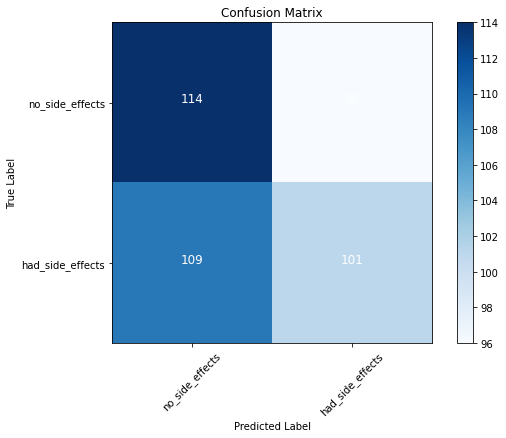

In [ ]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm = cm, classes=cm_plot_labels)

## save and load a model

In [ ]:
# check first if it already exists
"""
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
  model.save('models/medica_trial_nodel.h5')

"""

"\nimport os.path\nif os.path.isfile('models/medical_trial_model.h5') is False:\n  model.save('models/medica_trial_nodel.h5')\n\n"

In [ ]:
# load the model
"""
from tensorflow.keras.models import load_model
new_model = load_model('models/medial_trial_model.h5')

new_model.summary()

new_model.get_weights()

new_model.optimizer

"""


"\nfrom tensorflow.keras.models import load_model\nnew_model = load_model('models/medial_trial_model.h5')\n\nnew_model.summary()\n\nnew_model.get_weights()\n\nnew_model.optimizer\n\n"

## 2. model.to_json()
If you only need to save the architecture of a model and not its weighrs or its training configuration, you can use the following fucntin to save the architecture only.

In [ ]:
# save as json
json_string = model.to_json()

# save as YAML 
# yaml_string = model.to_yaml()|

In [ ]:
from tensorflow.keras.models import model_from_json
model_architecture  = model_from_json(json_string)

In [ ]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Convolution Neural Networks

## import data from kaggle

In [27]:
!pip uninstall -y kaggle

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6


In [28]:
!pip install kaggle==1.5.6

     |████████████████████████████████| 61kB 3.5MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=2f0e11188a799b59f12dd056ba139c7a6596b19b8fa81fd0d6114c1dfcb113dc
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle


In [29]:

!kaggle -v
!pwd

Kaggle API 1.5.6
/content


In [24]:
# upload the credentials of the kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"badhon7432","key":"766094a68072fac5b9031d72bc40cc41"}'}

In [25]:
# before importing the dataset we need to use this code
# the kaggle API client expects this file to be in ~/.kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# this permission change avoids a warning on kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

In [30]:
# download the data to data_folder
!kaggle competitions download -c dogs-vs-cats -p data_folder/

 98% 793M/812M [00:18<00:00, 31.0MB/s]
100% 812M/812M [00:18<00:00, 45.0MB/s]


## Process the data

In [31]:
import zipfile
with zipfile.ZipFile('data_folder/dogs-vs-cats.zip','r') as zipObj:
  zipObj.extractall('data_folder')

In [32]:
with zipfile.ZipFile('data_folder/train.zip','r') as zipObj:
  zipObj.extractall('data_folder/all')

### import the libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

### Data Preparation

In [33]:
os.chdir('/content/data_folder')
!pwd

/content/data_folder


In [34]:
print(glob.glob("all/train/*"))
count = glob.glob("all/train/*")
count = np.array(count)
print(count.shape)

['all/train/cat.8748.jpg', 'all/train/cat.11873.jpg', 'all/train/cat.629.jpg', 'all/train/dog.9017.jpg', 'all/train/dog.6334.jpg', 'all/train/cat.2753.jpg', 'all/train/dog.4055.jpg', 'all/train/cat.5747.jpg', 'all/train/dog.12258.jpg', 'all/train/cat.10351.jpg', 'all/train/cat.85.jpg', 'all/train/dog.5910.jpg', 'all/train/cat.1864.jpg', 'all/train/dog.6984.jpg', 'all/train/dog.4010.jpg', 'all/train/cat.5726.jpg', 'all/train/cat.3862.jpg', 'all/train/dog.7301.jpg', 'all/train/cat.10970.jpg', 'all/train/dog.8004.jpg', 'all/train/cat.5481.jpg', 'all/train/dog.8828.jpg', 'all/train/dog.4036.jpg', 'all/train/dog.8993.jpg', 'all/train/cat.7143.jpg', 'all/train/dog.143.jpg', 'all/train/dog.11517.jpg', 'all/train/dog.8500.jpg', 'all/train/cat.7371.jpg', 'all/train/dog.8949.jpg', 'all/train/cat.4975.jpg', 'all/train/dog.10824.jpg', 'all/train/dog.7102.jpg', 'all/train/cat.10610.jpg', 'all/train/dog.6777.jpg', 'all/train/cat.5299.jpg', 'all/train/dog.184.jpg', 'all/train/dog.7029.jpg', 'all/trai

In [35]:
if os.path.isdir('train/dog') is False:
  os.makedirs('train/dog')
  os.makedirs('train/cat')
  os.makedirs('valid/dog')
  os.makedirs('valid/cat')
  os.makedirs('test/dog')
  os.makedirs('test/cat')

  for c in random.sample(glob.glob('all/train/cat*'), 500):
    shutil.move(c, 'train/cat')
  for c in random.sample(glob.glob('all/train/dog*'), 500):
    shutil.move(c, 'train/dog')
  for c in random.sample(glob.glob('all/train/cat*'), 100):
    shutil.move(c, 'valid/cat')
  for c in random.sample(glob.glob('all/train/dog*'), 100):
    shutil.move(c, 'valid/dog')
  for c in random.sample(glob.glob('all/train/cat*'), 50):
    shutil.move(c, 'test/cat')
  for c in random.sample(glob.glob('all/train/dog*'), 50):
    shutil.move(c, 'test/dog')

os.chdir('../')

In [36]:
!pwd

/content


In [37]:
train_path = 'data_folder/train'
test_path = 'data_folder/test'
valid_path = 'data_folder/valid'

In [38]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory= train_path, target_size = (224,224), classes = ['cat', 'dog'], batch_size = 10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory= valid_path, target_size = (224,224), classes = ['cat', 'dog'], batch_size = 10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory= test_path, shuffle=False, target_size = (224,224), classes = ['cat', 'dog'], batch_size = 10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [39]:
# asserting
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [40]:
img, labels = next(train_batches)
# this should give a batch of 10 from the training set as our batch size is 10

In [41]:
# plot the images in a grid format
def plotImages(image_arr):
  fig, axes = plt.subplots(1,10, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(image_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

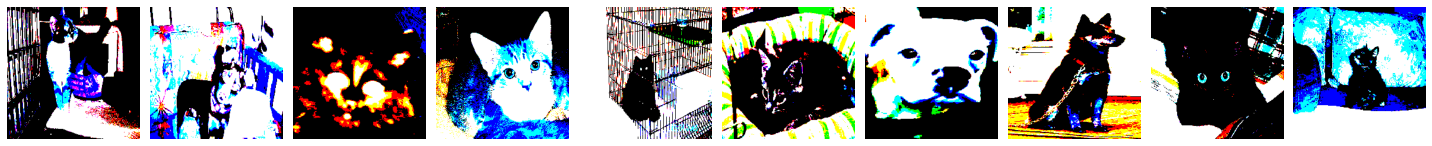

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [42]:
plotImages(img)
print(labels)

# image will be distorted because of the preprocessing

### Build a CNN Model

In [ ]:
model = Sequential([
                    Conv2D(32, (3,3), activation='relu', padding='same', input_shape = (224,224,3)),
                    MaxPool2D((2,2), strides=2),
                    Conv2D(64, (3,3), activation='relu', padding='same'),
                    MaxPool2D((2,2), strides=2),
                    Flatten(),
                    Dense(units=2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
model.fit(x = train_batches,
          steps_per_epoch = len(train_batches),
          validation_data = valid_batches,
          validation_steps = len(valid_batches),
          epochs = 10,
          verbose = 2)

Epoch 1/10
100/100 - 6s - loss: 30.8021 - acc: 0.5420 - val_loss: 0.7191 - val_acc: 0.5100
Epoch 2/10
100/100 - 6s - loss: 0.5638 - acc: 0.7130 - val_loss: 0.8148 - val_acc: 0.4900
Epoch 3/10
100/100 - 6s - loss: 0.3543 - acc: 0.8450 - val_loss: 0.8344 - val_acc: 0.5200
Epoch 4/10
100/100 - 6s - loss: 0.1624 - acc: 0.9530 - val_loss: 1.3025 - val_acc: 0.5450
Epoch 5/10
100/100 - 6s - loss: 0.0557 - acc: 0.9910 - val_loss: 1.5247 - val_acc: 0.5850
Epoch 6/10
100/100 - 6s - loss: 0.0186 - acc: 0.9970 - val_loss: 1.8825 - val_acc: 0.5600
Epoch 7/10
100/100 - 6s - loss: 0.0045 - acc: 1.0000 - val_loss: 2.2693 - val_acc: 0.6000
Epoch 8/10
100/100 - 6s - loss: 0.0018 - acc: 1.0000 - val_loss: 2.5658 - val_acc: 0.5950
Epoch 9/10
100/100 - 6s - loss: 0.0011 - acc: 1.0000 - val_loss: 2.6793 - val_acc: 0.5950
Epoch 10/10
100/100 - 6s - loss: 9.1066e-04 - acc: 1.0000 - val_loss: 2.7754 - val_acc: 0.5850


## Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

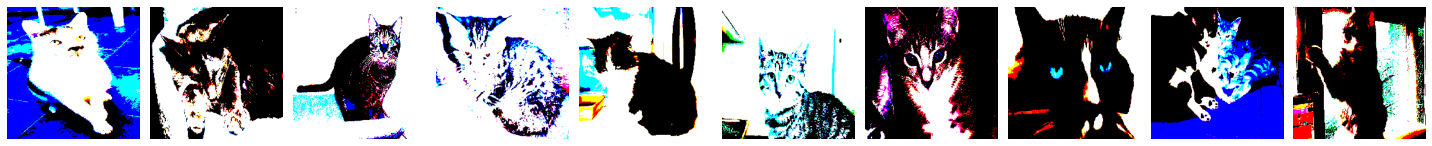

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [ ]:
pred = model.predict(x=test_batches, verbose=0)

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
np.round(pred)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(pred, axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[18 32]
 [16 34]]


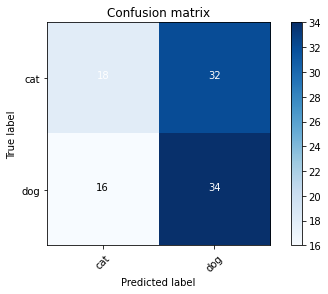

In [ ]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm = cm, classes = cm_plot_labels)

# Fine Tuned VGG16 model

In [2]:
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 5s 0us/step


In [3]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
type(vgg16_model)
# it is a type "Model" from Functional. And we need Sequential

tensorflow.python.keras.engine.functional.Functional

In [5]:
model = Sequential()
for layer in vgg16_model.layers:
  model.add(layer)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [16]:
# pop out the last layer as we need to use only for two classes not 1000 classes
model.pop()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [19]:
for layer in model.layers:
  layer.trainable = False

# this is done to freeze the model so that the model does not train the weights of these layers

In [20]:
model.add(Dense(2, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

### Compile the new model

In [22]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [45]:
model.fit_generator(train_batches,
                    steps_per_epoch = 10,
                    validation_data = valid_batches,
                    validation_steps = 10,
                    epochs = 5,
                    verbose = 2)

Epoch 1/5
10/10 - 2s - loss: 0.1470 - acc: 0.9600 - val_loss: 0.1101 - val_acc: 0.9200
Epoch 2/5
10/10 - 2s - loss: 0.1963 - acc: 0.9300 - val_loss: 0.0504 - val_acc: 0.9900
Epoch 3/5
10/10 - 2s - loss: 0.0698 - acc: 0.9900 - val_loss: 0.0549 - val_acc: 0.9800
Epoch 4/5
10/10 - 2s - loss: 0.0711 - acc: 0.9700 - val_loss: 0.0113 - val_acc: 1.0000
Epoch 5/5
10/10 - 2s - loss: 0.0262 - acc: 0.9800 - val_loss: 0.0535 - val_acc: 0.9800


In [47]:
model.evaluate_generator(test_batches, verbose=1)

10/10 [==============================] - 1s 116ms/step - loss: 0.1015 - acc: 0.9700


[0.10150646418333054, 0.9700000286102295]

### Predict VGG16

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

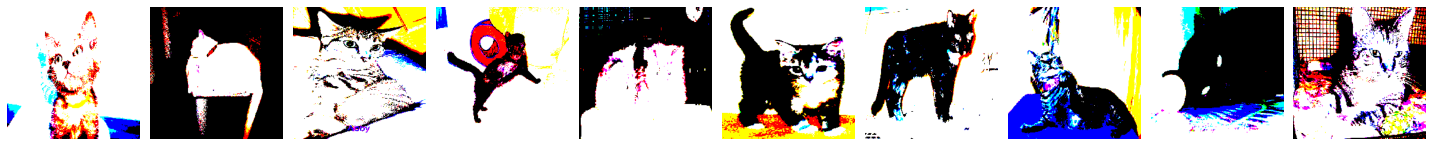

In [49]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)


In [50]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [51]:
pred = model.predict_generator(test_batches, steps=1, verbose=0)

Instructions for updating:
Please use Model.predict, which supports generators.


In [54]:
cm = confusion_matrix(test_labels, np.round(pred[:,0]))

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 0]
 [1 9]]


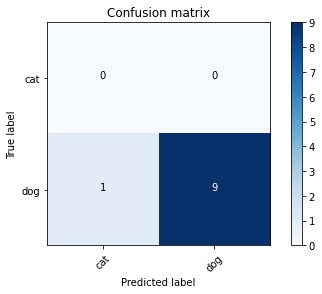

In [56]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm = cm, classes = cm_plot_labels)